In [2]:
import os
if(os.getcwd().split('/')[-1] == "ipynb"):
    os.chdir("../")
import matplotlib.pyplot as plt
import pickle
import math
import random
import numpy as np
from od.env.config import ROOT_DIR
from od.env.station import BS_PRESET
from od.network.types import ResourceAllocatorType,BaseStationType
from od.misc.interest import InterestConfig
from od.misc.statistic import NetFlowType
from numpy import random
# ROOT_DIR = "/home/OD/repos/RecentProjectSumoData/GS20/"
ROOT_DIR = "/home/OD/repos/ProjectSumo/data/GS20/"
plt.rcParams.update(
    {
    "text.usetex": False,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"],
    "legend.loc":"upper left",
    "legend.framealpha":0.3,
    "font.size":26,
    "figure.autolayout":True,
    "figure.dpi": 100,
    "axes.titlesize":"medium",
    "legend.fontsize":"x-small",
    'figure.figsize': [6,4],

    }
)
_pinf = float("inf")
_ninf = float("-inf")


In [3]:
# create picture folder
dirpath = "pics/"
if not os.path.isdir(dirpath):
    os.mkdir(dirpath)

In [4]:
# plt.rcParams.keys()

In [15]:
qos_re_class_range = [True,False]
seed_range = [ (i + 5) for i in range(5) ]
res_alloc_type_range = [ResourceAllocatorType.NOMA_OPT,ResourceAllocatorType.NOMA_APR]
req_rsu_range = [False, True]
traffic_scale_range = [ i/10 for i in range(10,15,1) ]

In [16]:
LINE_MARKER_STYLES = [
    marker_style + line_style
    for marker_style in ['o', 'v', '^', '<', '>', '*', 'x','d']
    for line_style in ['--', '-.', ':']
]
random.seed(1)
random.shuffle(LINE_MARKER_STYLES)


def GetLineMarkerStyle(line_no):
    return LINE_MARKER_STYLES[line_no % len(LINE_MARKER_STYLES)]


In [17]:
bs_names = {
    BaseStationType.UMA: "4G-eNB",
    BaseStationType.UMI: "5G-gNB",
}

In [18]:
def ExtractAbbreviations(abbrev):
    if(abbrev.lower() == "avg"):
        return "Average"
    elif(abbrev.lower() == "max"):
        return "Maximum"
    elif(abbrev.lower() == "min"):
        return "Minimum"

In [19]:
def BaseStationScenario(with_rsu):
    if(with_rsu):
        return "4G+5G"
    else:
        return  "4G"

In [20]:
def ScenarioAllocName(alloc_type):
    if(alloc_type == ResourceAllocatorType.OMA):
        return "OMA"
    elif(alloc_type == ResourceAllocatorType.NOMA_OPT):
        return "NOMA-Optim"
    elif(alloc_type == ResourceAllocatorType.NOMA_APR):
        return "NOMA-Approx"

In [21]:
def ScenarioPrefix(req_rsu, qos_re_class):
    if not req_rsu:
        return "MC"
    elif not qos_re_class:
        return "SA"
    return "QR"

In [22]:
YRSU_SCENARIO_BS_ID = []
NRSU_SCENARIO_BS_ID = []
for name, bs_config in BS_PRESET.items():
    if (bs_config["type"] == BaseStationType.UMA):
        YRSU_SCENARIO_BS_ID.append(name)
        NRSU_SCENARIO_BS_ID.append(name)
    if (bs_config["type"] == BaseStationType.UMI):
        YRSU_SCENARIO_BS_ID.append(name)


def GetScenarioBaseStationNames(req_rsu):
    return YRSU_SCENARIO_BS_ID if req_rsu else NRSU_SCENARIO_BS_ID


In [23]:
def ScenarioNetFlowType(qos_re_class):
    if(qos_re_class):
        return NetFlowType
    else:
        return [NetFlowType.CRITICAL,NetFlowType.GENERAL]
def ScenarioQoSReClassRange(req_rsu):
    if(req_rsu):
        return [True,False]
    else:
        return [False]

In [25]:
interest_config = InterestConfig(False, ResourceAllocatorType.NOMA_OPT, False, 0, 0)
stats = {
    qos_re_class:
    {
        seed: {
            res_alloc_type: {
                req_rsu: {
                    traffic_scale: None
                    for traffic_scale in traffic_scale_range
                }
                for req_rsu in req_rsu_range
            }
            for res_alloc_type in res_alloc_type_range
        }
        for seed in seed_range
    }
    for qos_re_class in qos_re_class_range
}
for qos_re_class in qos_re_class_range:
    for seed in seed_range:
        for res_alloc_type in res_alloc_type_range:
            for req_rsu in req_rsu_range:
                for traffic_scale in traffic_scale_range:
                    interest_config.qos_re_class = qos_re_class
                    interest_config.res_alloc_type = res_alloc_type
                    interest_config.req_rsu = req_rsu
                    interest_config.traffic_scale=traffic_scale
                    interest_config.rng_seed = seed
                    try:

                        with open(ROOT_DIR + interest_config.folder() + "report.pickle", "rb") as file:
                            # with open("data/yQoS/{}/{}/report_adjust_wait_time_nQoS.pickle".format(seed,str(interest_config)), "rb") as file:
                            stats[qos_re_class][seed][res_alloc_type][req_rsu][traffic_scale] = pickle.load(file)
                    except:
                        print("missing: {}".format(str(interest_config)))


missing: yQoS-nRSU-NOMA_OPT-D1.0-S5
missing: yQoS-nRSU-NOMA_OPT-D1.1-S5
missing: yQoS-nRSU-NOMA_OPT-D1.2-S5
missing: yQoS-nRSU-NOMA_OPT-D1.3-S5
missing: yQoS-nRSU-NOMA_OPT-D1.4-S5
missing: yQoS-nRSU-NOMA_APR-D1.0-S5
missing: yQoS-nRSU-NOMA_APR-D1.1-S5
missing: yQoS-nRSU-NOMA_APR-D1.2-S5
missing: yQoS-nRSU-NOMA_APR-D1.3-S5
missing: yQoS-nRSU-NOMA_APR-D1.4-S5
missing: yQoS-nRSU-NOMA_OPT-D1.0-S6
missing: yQoS-nRSU-NOMA_OPT-D1.1-S6
missing: yQoS-nRSU-NOMA_OPT-D1.2-S6
missing: yQoS-nRSU-NOMA_OPT-D1.3-S6
missing: yQoS-nRSU-NOMA_OPT-D1.4-S6
missing: yQoS-nRSU-NOMA_APR-D1.0-S6
missing: yQoS-nRSU-NOMA_APR-D1.1-S6
missing: yQoS-nRSU-NOMA_APR-D1.2-S6
missing: yQoS-nRSU-NOMA_APR-D1.3-S6
missing: yQoS-nRSU-NOMA_APR-D1.4-S6
missing: yQoS-nRSU-NOMA_OPT-D1.0-S7
missing: yQoS-nRSU-NOMA_OPT-D1.1-S7
missing: yQoS-nRSU-NOMA_OPT-D1.2-S7
missing: yQoS-nRSU-NOMA_OPT-D1.3-S7
missing: yQoS-nRSU-NOMA_OPT-D1.4-S7
missing: yQoS-nRSU-NOMA_APR-D1.0-S7
missing: yQoS-nRSU-NOMA_APR-D1.1-S7
missing: yQoS-nRSU-NOMA_APR-

In [26]:
np.argsort([stats[True][seed][ResourceAllocatorType.NOMA_OPT][True][1.4]['end-to-end']['GENERAL']['avg'] for seed in seed_range]) + 1

array([3, 1, 4, 5, 2])

In [27]:
from matplotlib.ticker import MaxNLocator
graphs = {}
class Line:
    def __init__(self,label,x,y):
        self.label = label
        self.x = x
        self.y = y
class Graph:
    def __init__(self,title,xlabel,ylabel,yscale_opts = {"value":"linear"},ncols=3):
        self.title = title
        self.xlabel = xlabel
        self.ylabel = ylabel
        self.lines = []
        self.yscale_opts = yscale_opts
        self.ncols = ncols
    def addLine(self,line:Line):
        self.lines.append(line)
def ShowGraphs(graphs,save):
    for _g,(title,graph) in enumerate(graphs.items()):
        plt.figure(_g, figsize=(11, 8))
        plt.title(title)
        plt.xlabel(graph.xlabel)
        plt.ylabel(graph.ylabel)
        plt.yscale(**(graph.yscale_opts))
        plt.gca().xaxis.set_major_locator(MaxNLocator(5,min_n_ticks=3))
        for _l, line in enumerate(graph.lines):
            plt.plot(
                line.x,
                line.y,
                GetLineMarkerStyle(_l),
                label=line.label
            )
        plt.legend(loc='upper center', bbox_to_anchor=(0.5,-0.15),ncol=graph.ncols)
        if save :
            plt.savefig('{}/{}.pdf'.format(dirpath, title),bbox_inches="tight")
    plt.show()

In [35]:
print([stats[True][seed][ResourceAllocatorType.NOMA_OPT][True][1.3]["end-to-end"]["GENERAL"]["avg"] for seed in range(5,10)])
print([stats[True][seed][ResourceAllocatorType.NOMA_APR][True][1.3]["end-to-end"]["GENERAL"]["avg"] for seed in range(5,10)])


[0.16247624961067095, 0.15346655485622596, 0.0849598114213867, 0.11958994995274926, 0.24651253139166537]
[0.13507504438771958, 0.14352375161501027, 0.1254538979896642, 0.14483019052517074, 0.14856470569420954]


/tmp/ipykernel_715543/232111236.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(_g, figsize=(11, 8))
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


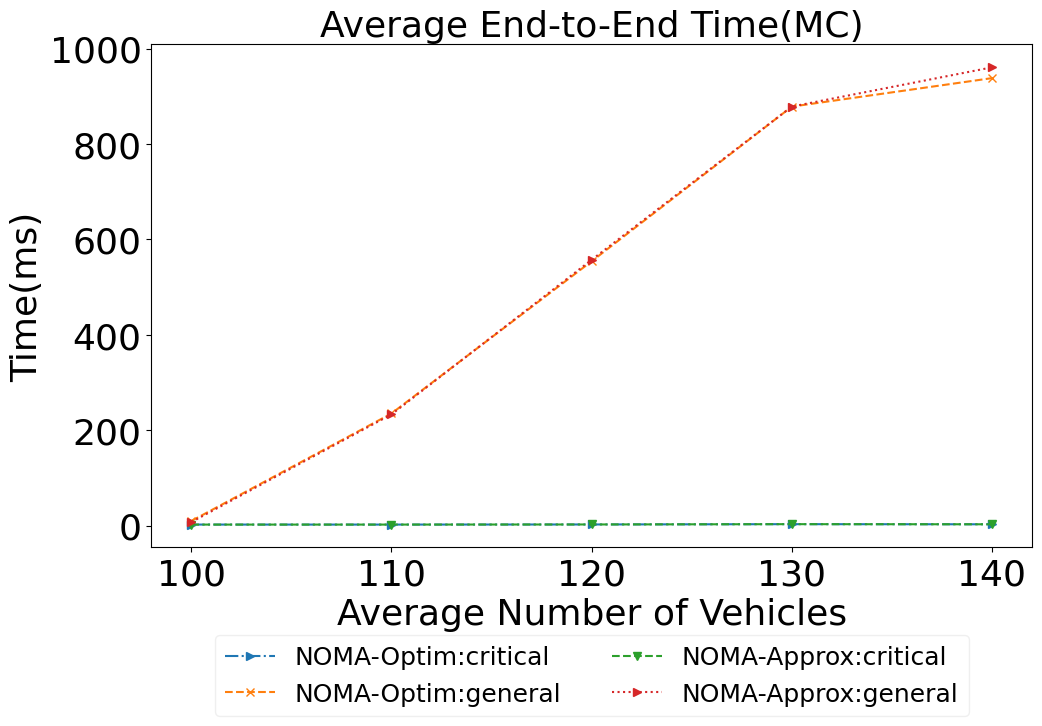

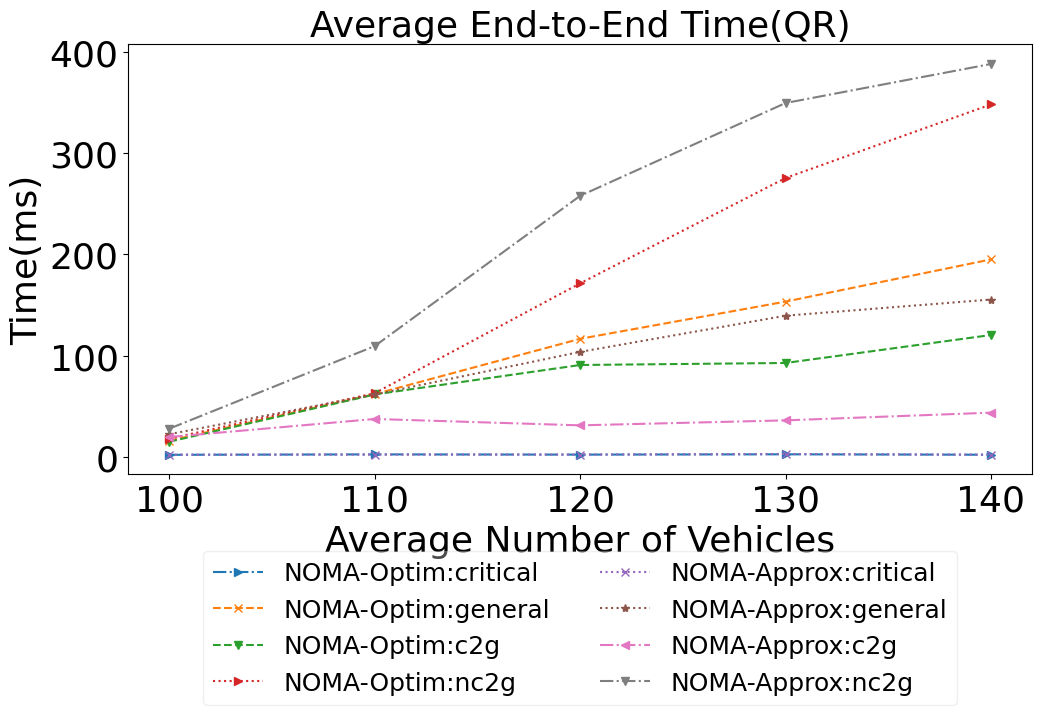

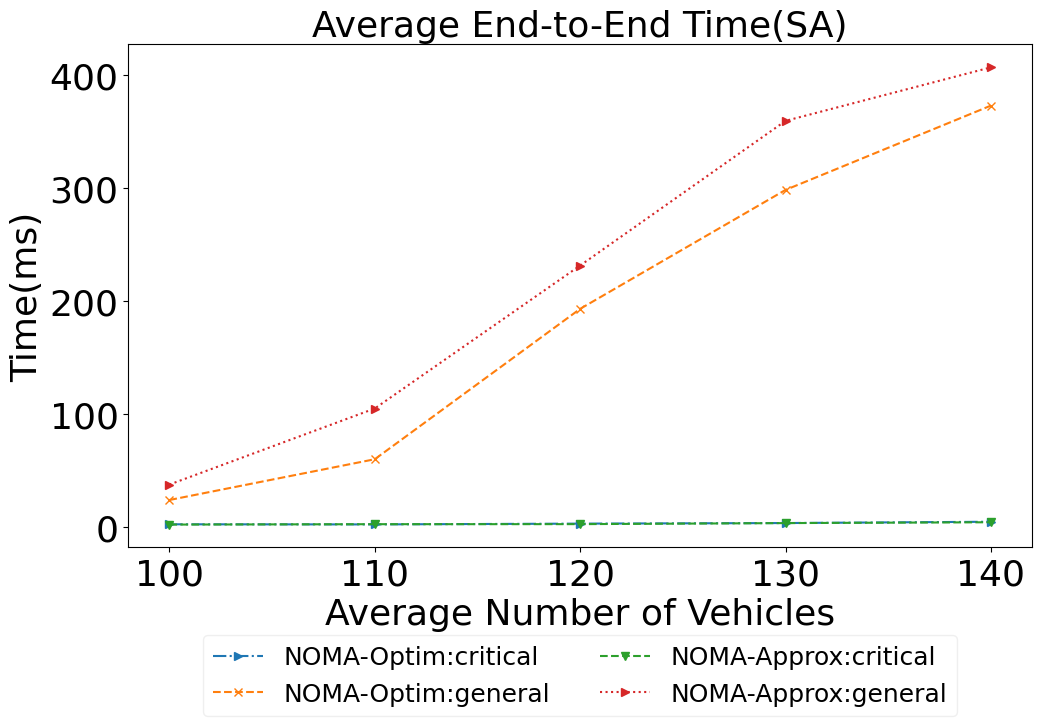

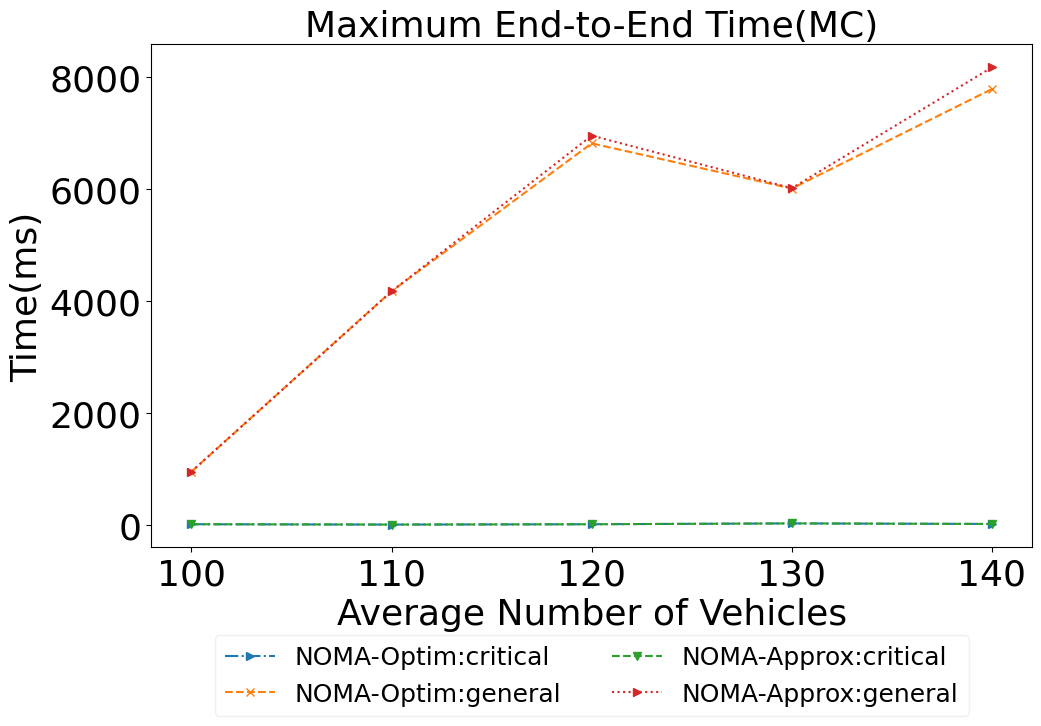

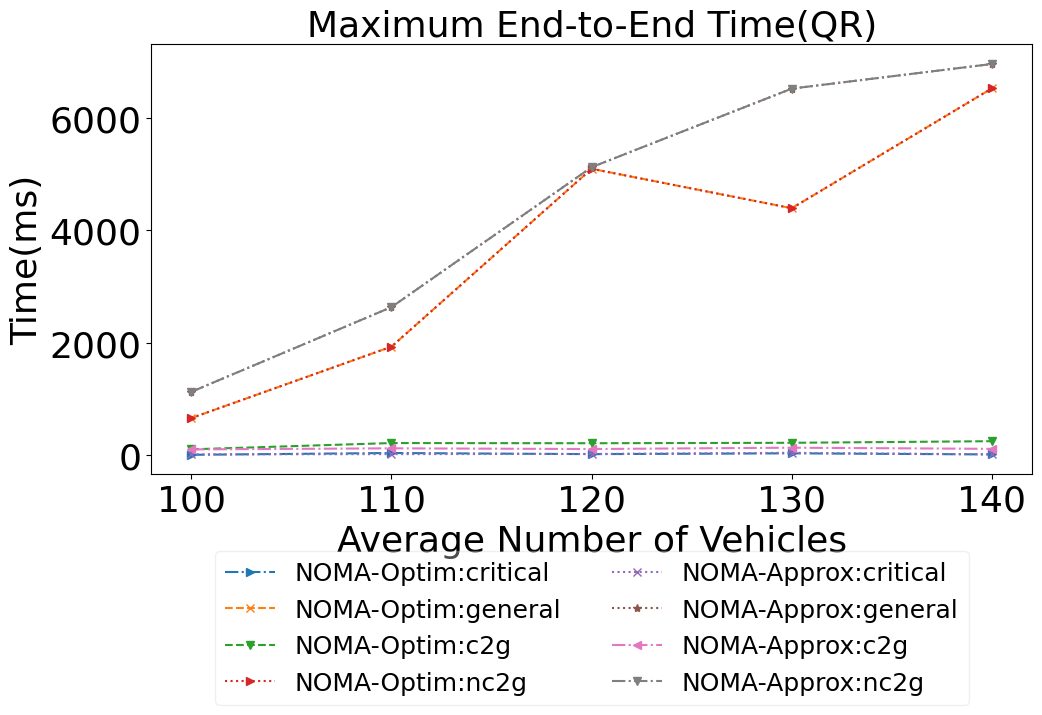

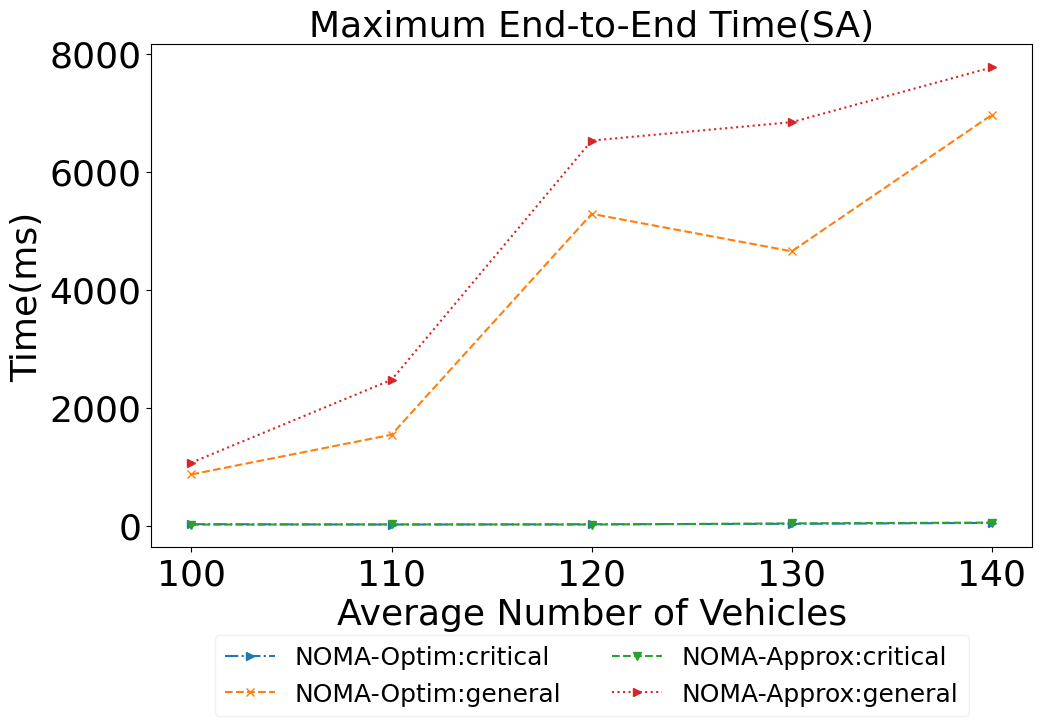

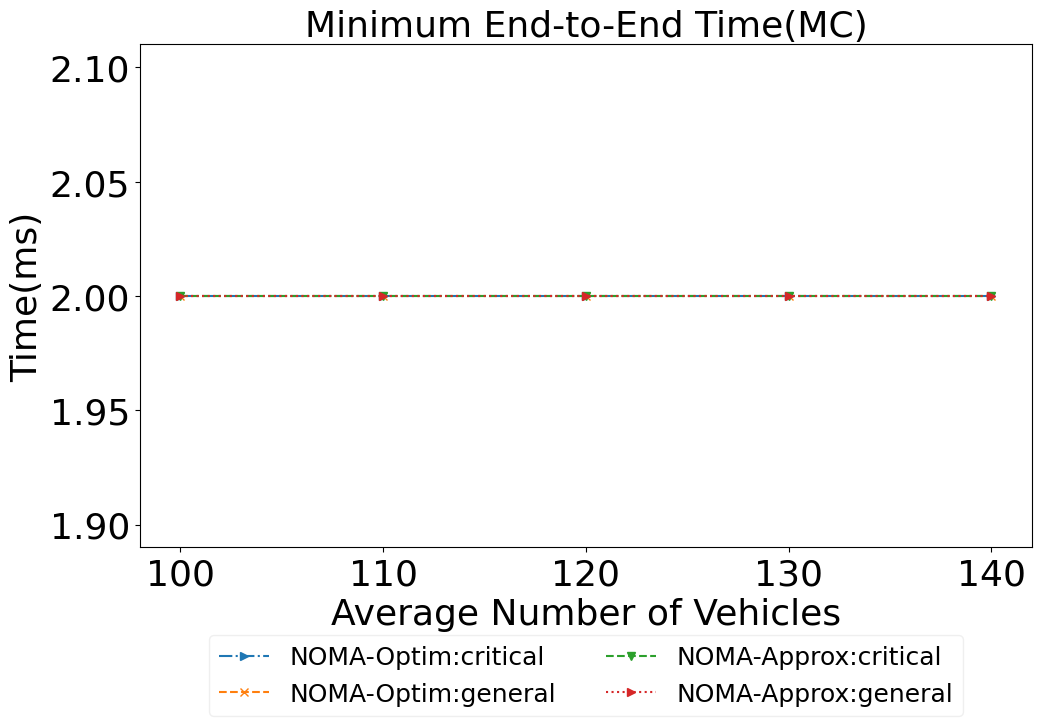

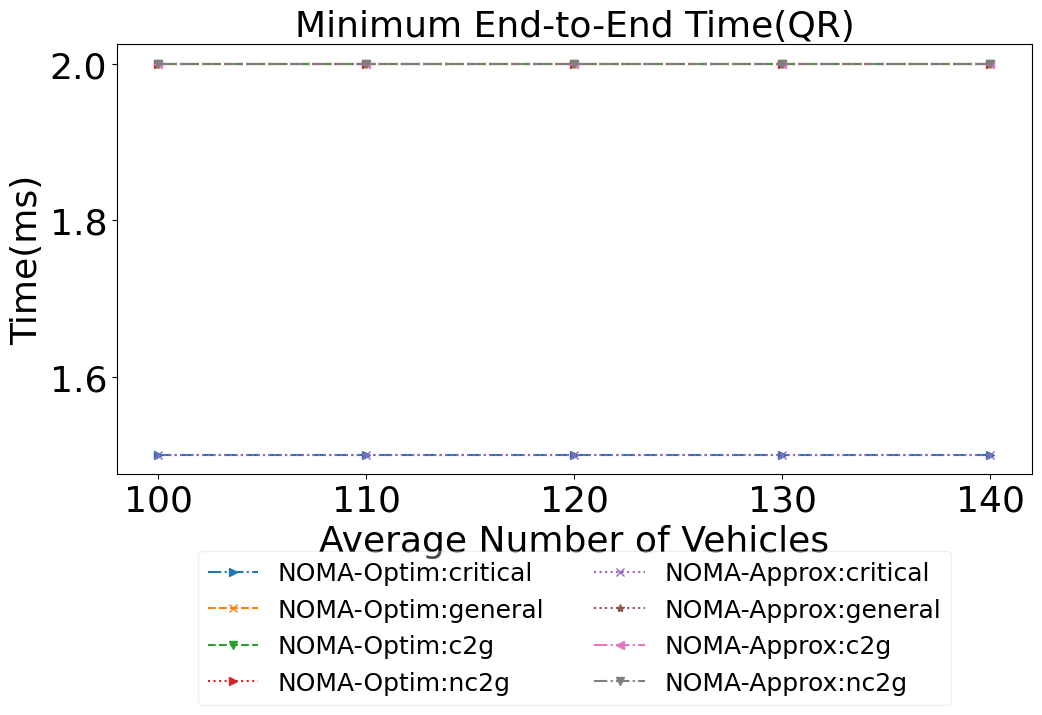

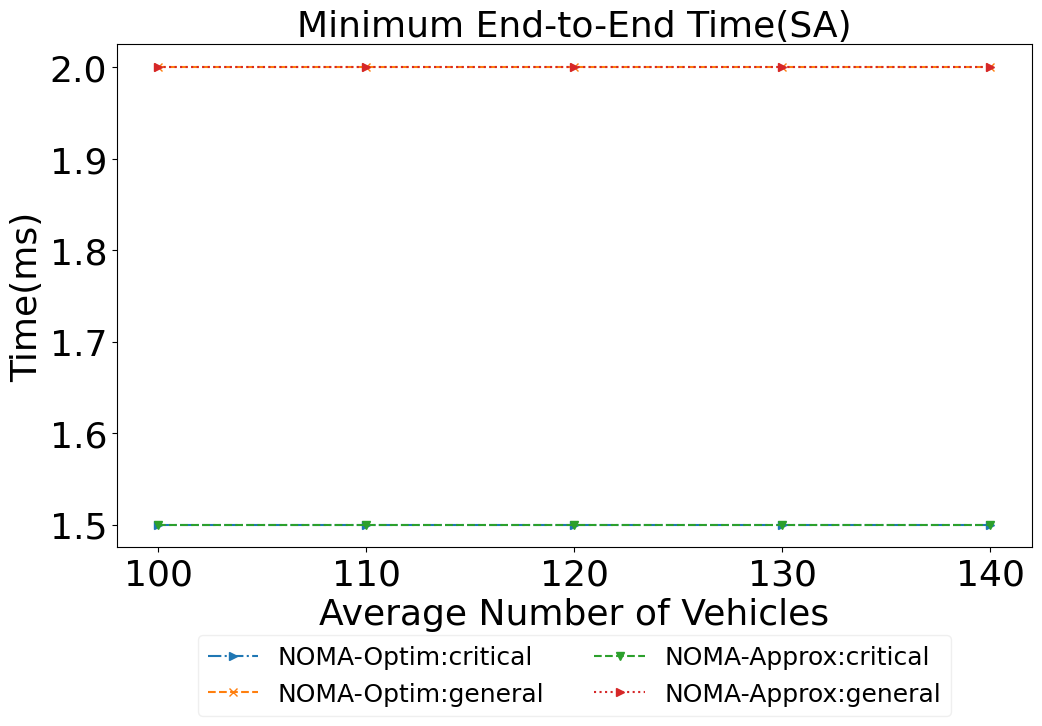

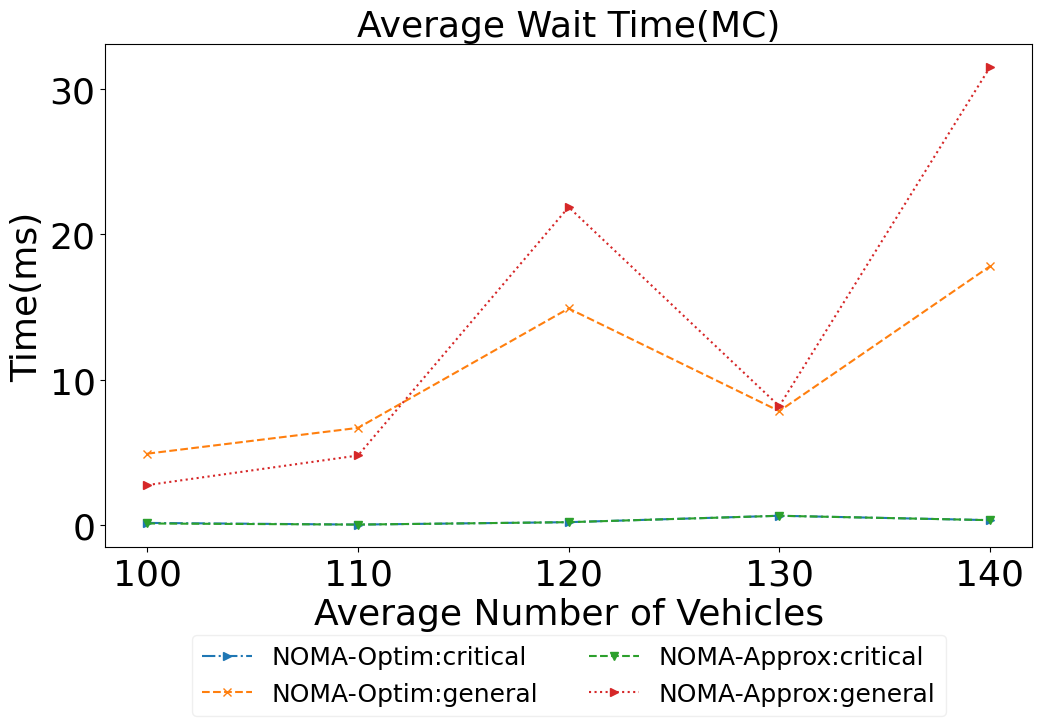

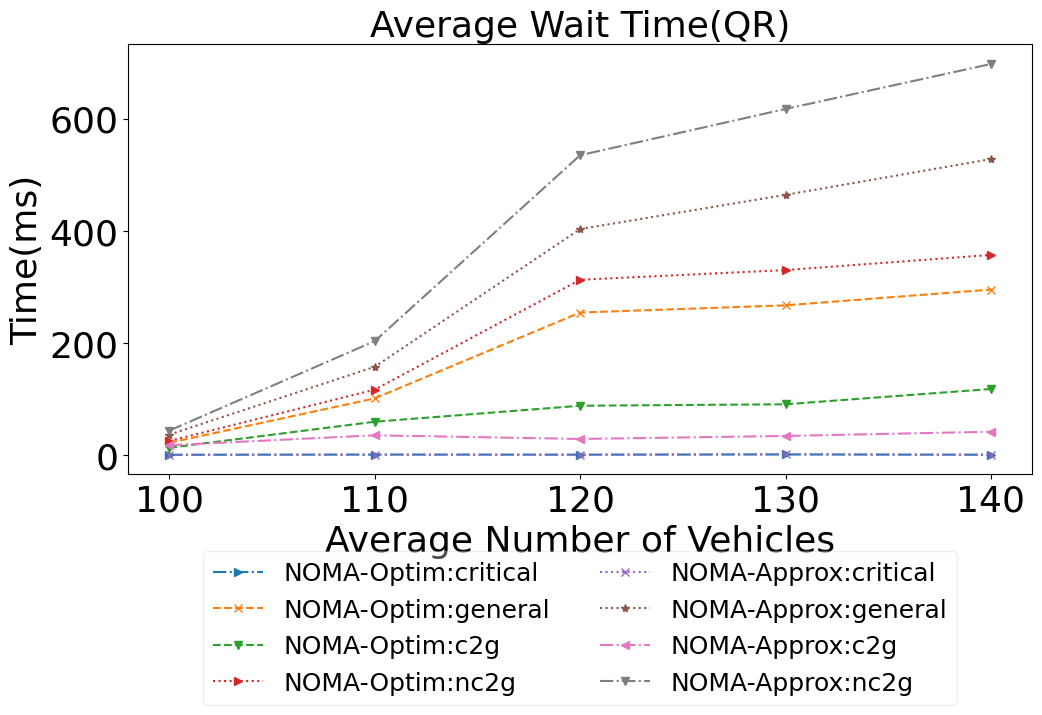

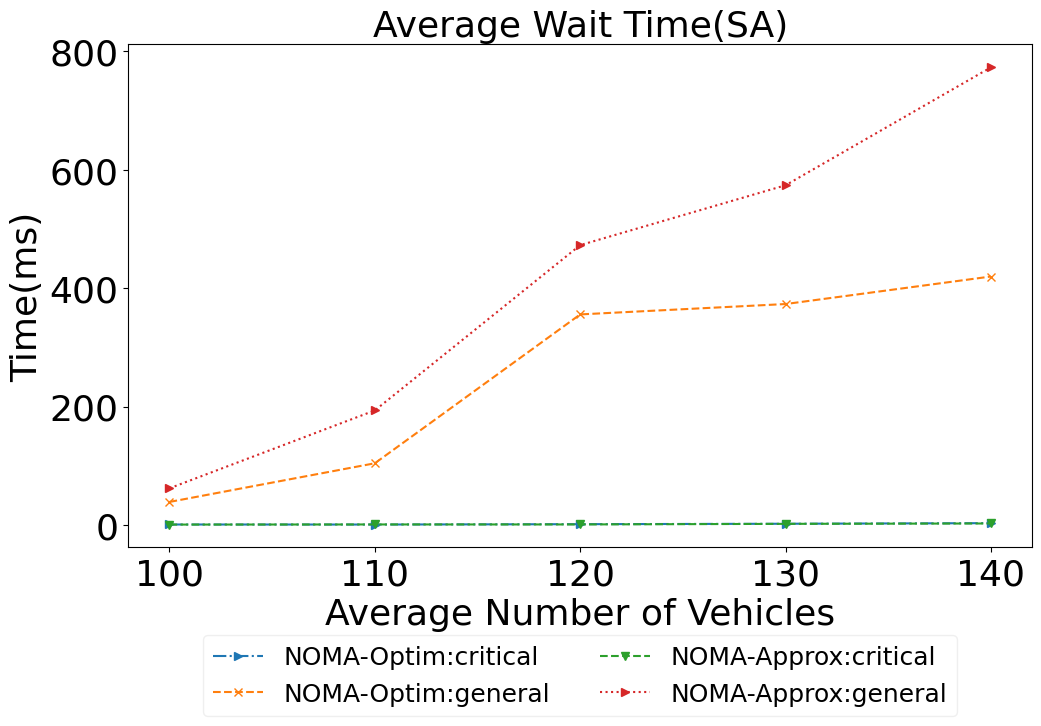

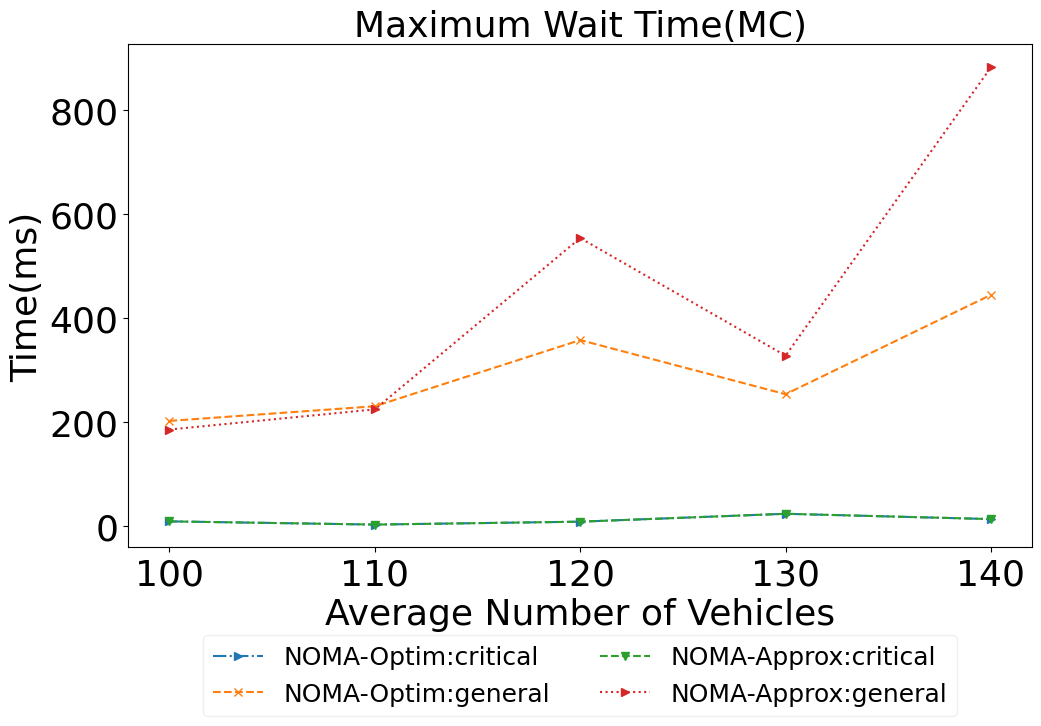

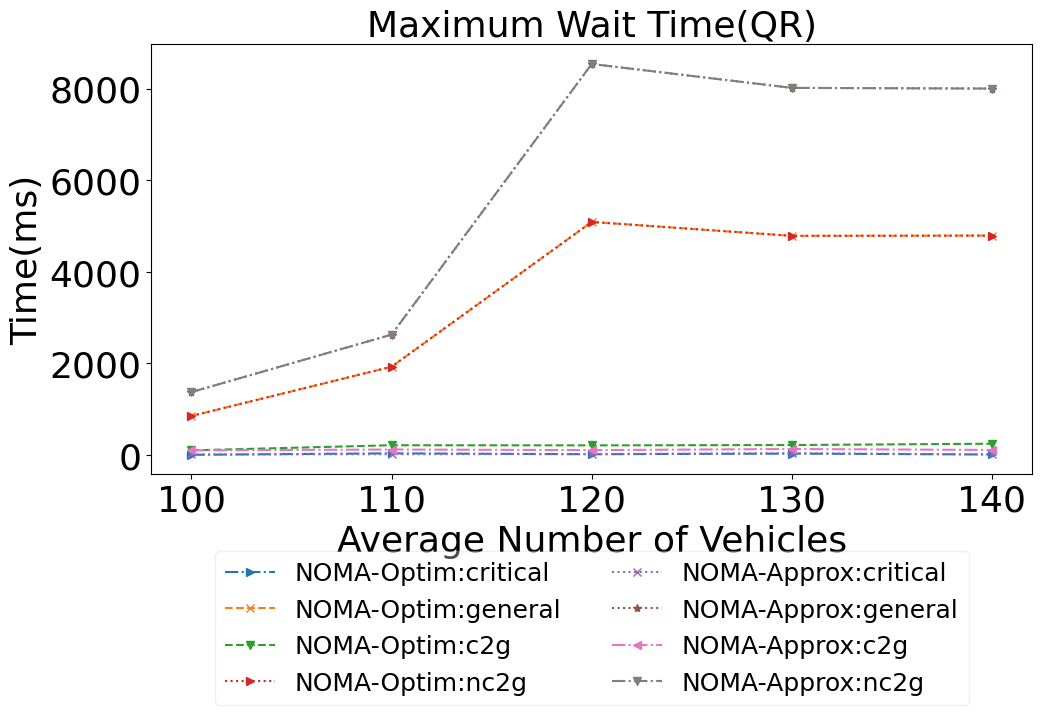

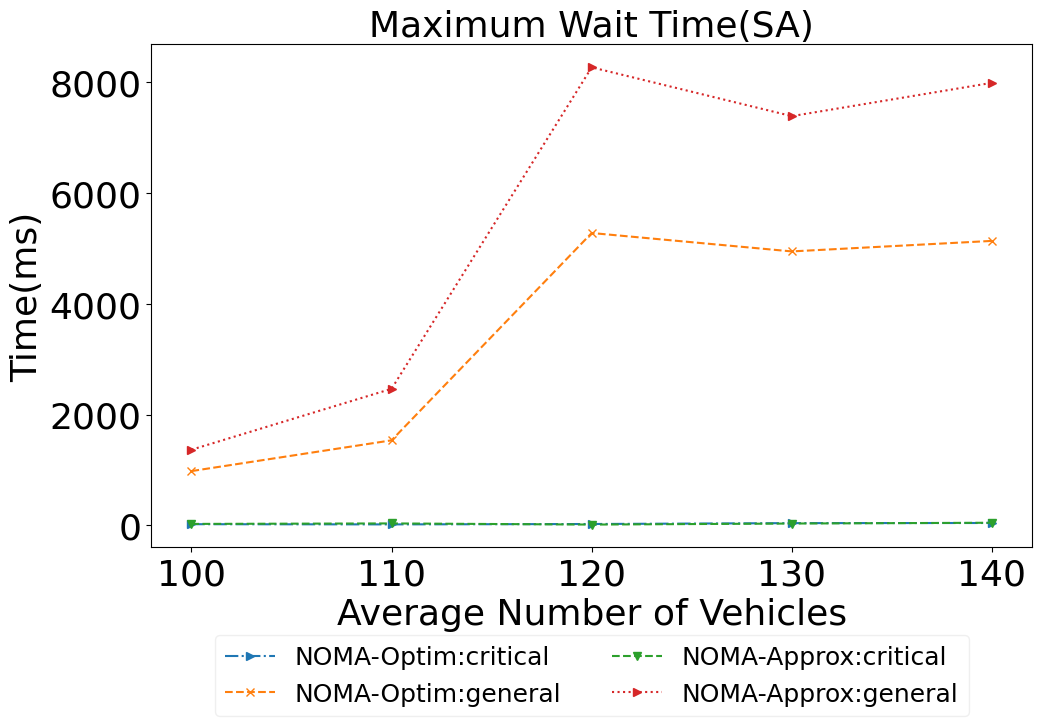

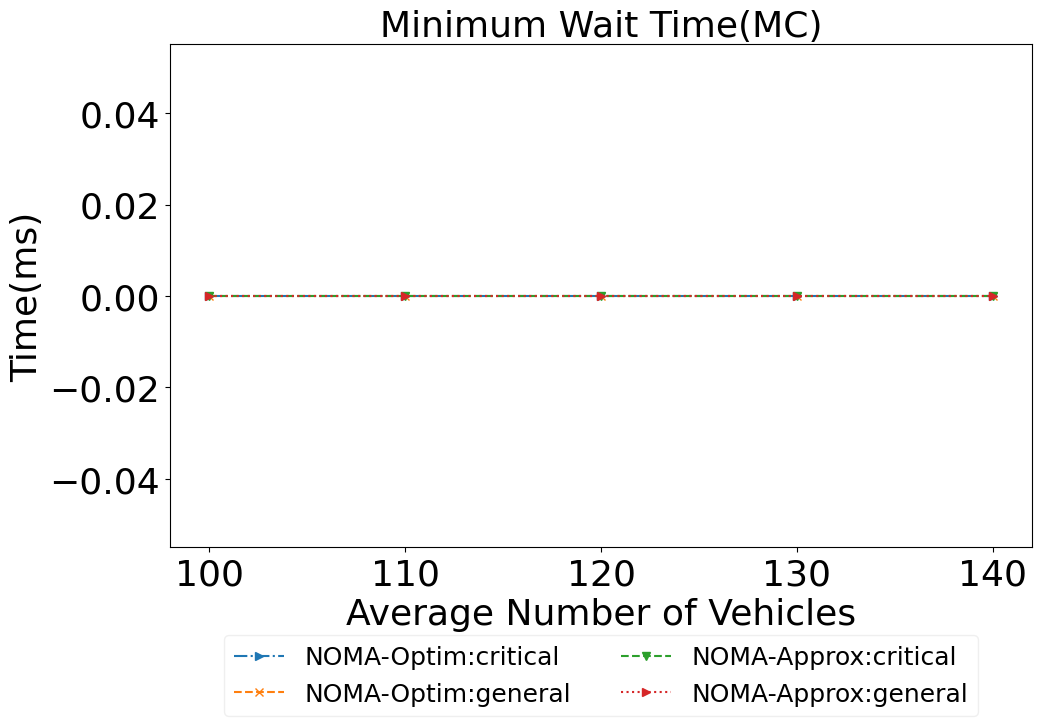

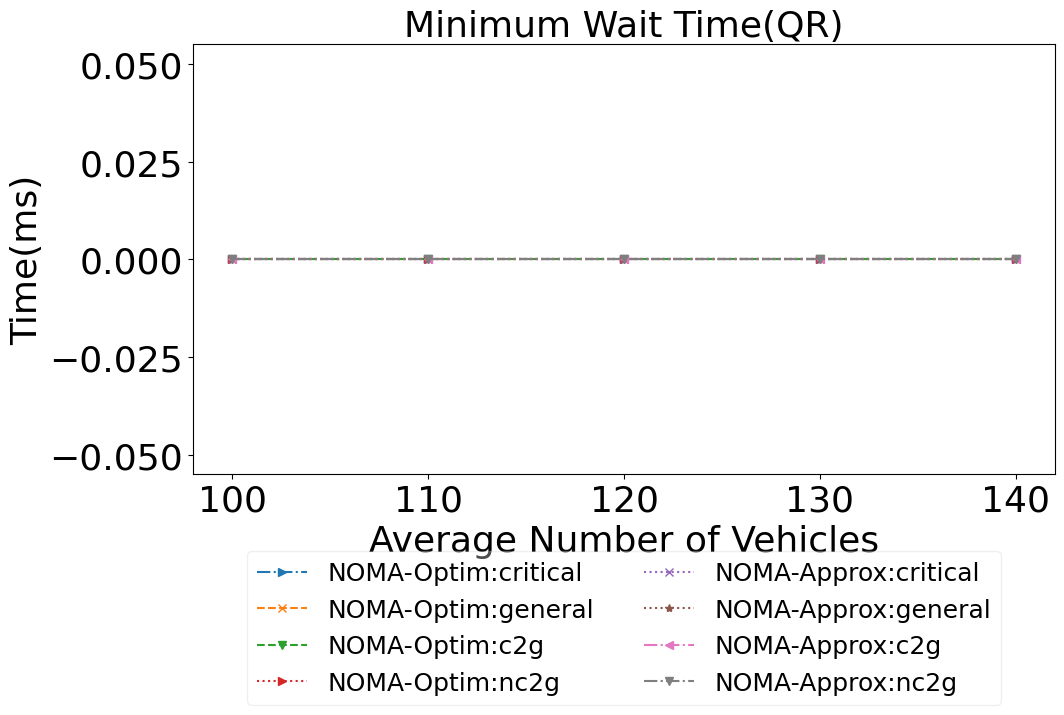

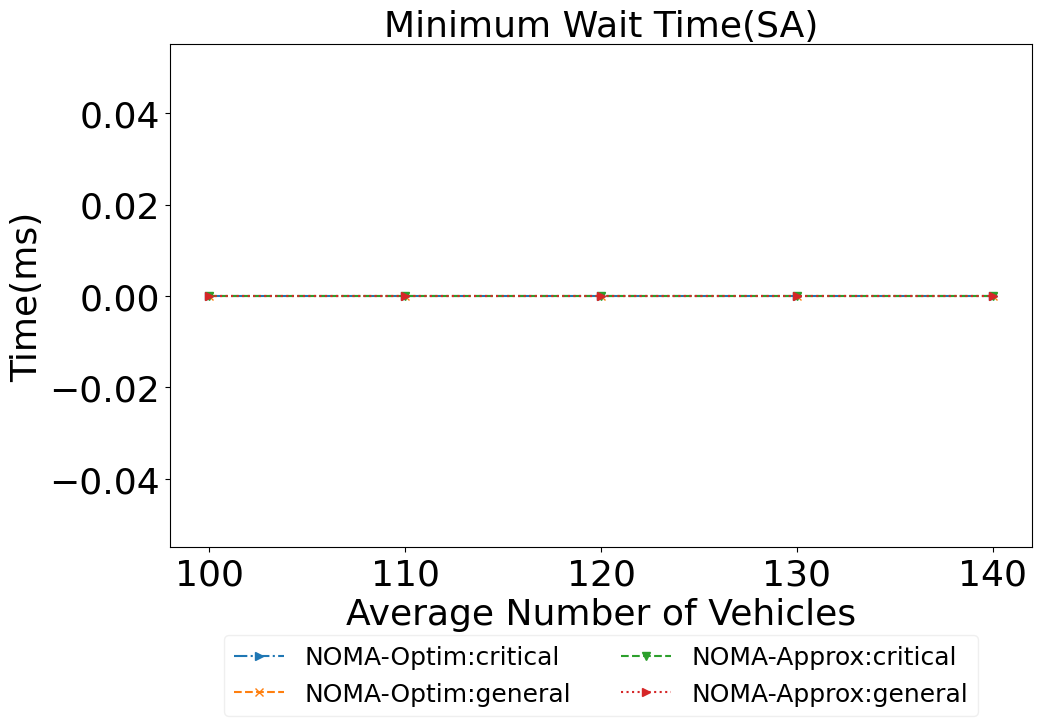

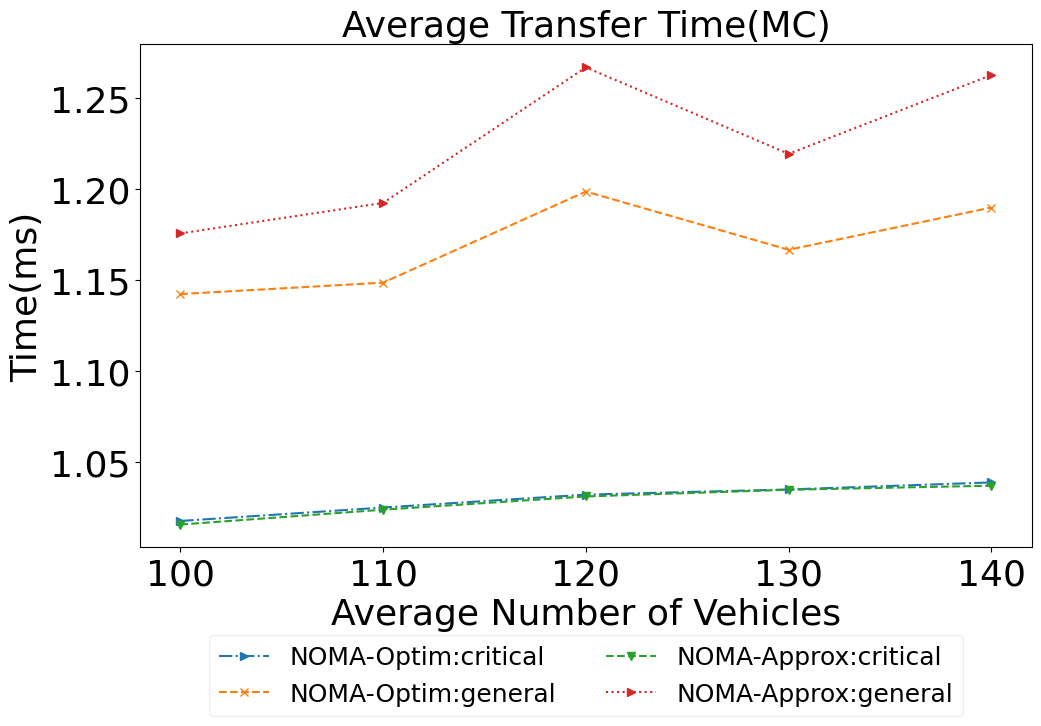

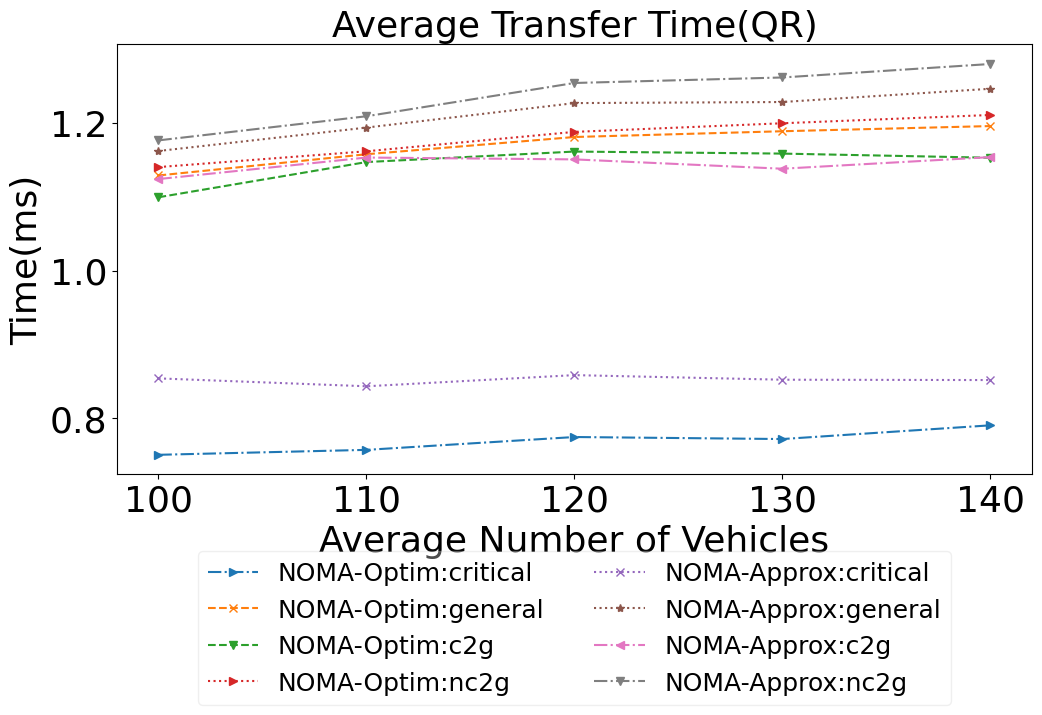

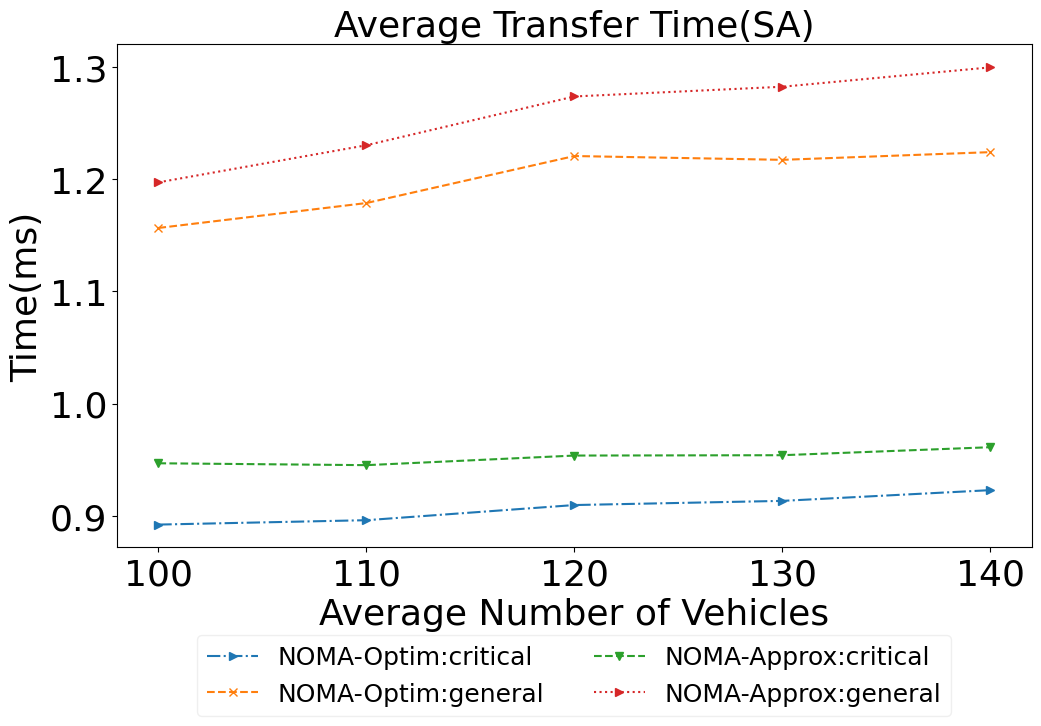

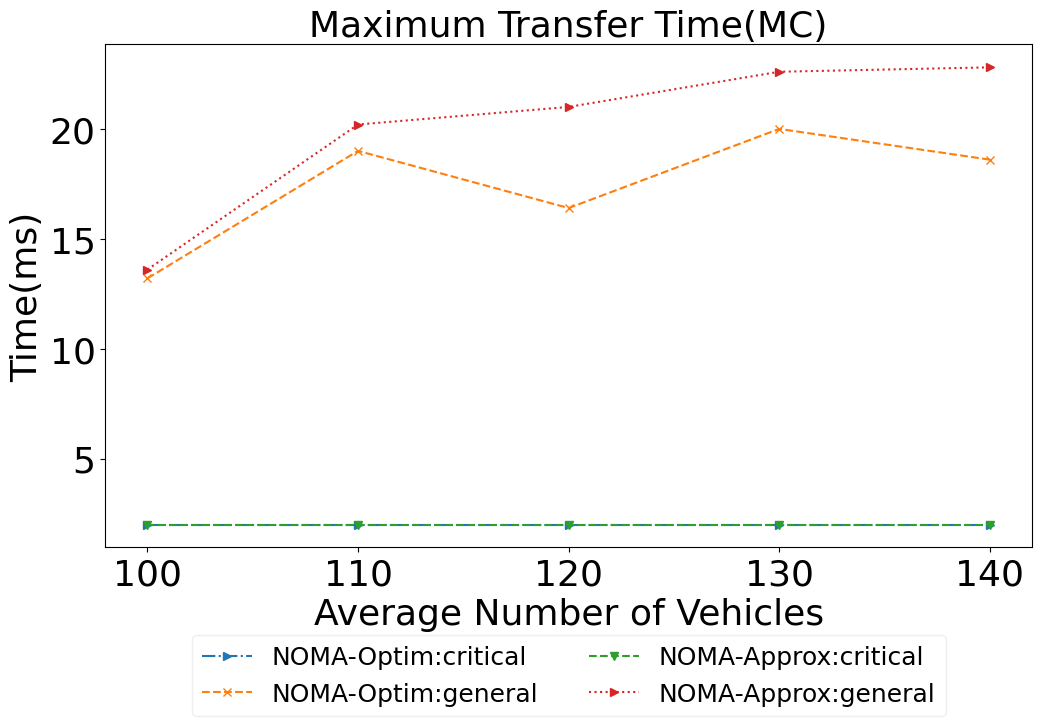

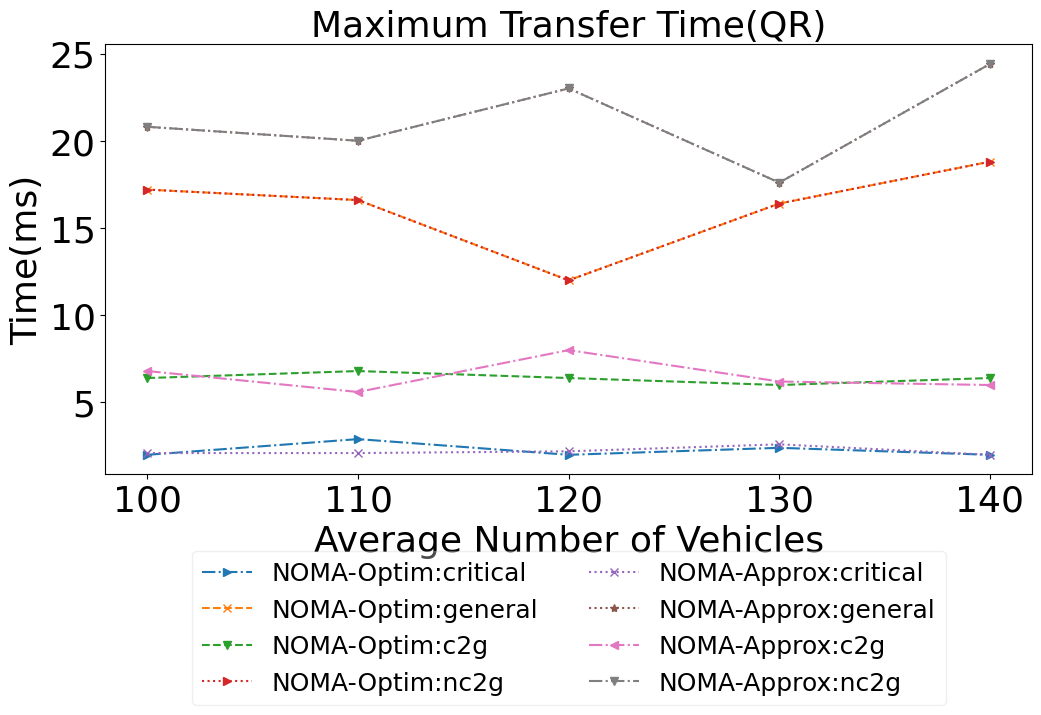

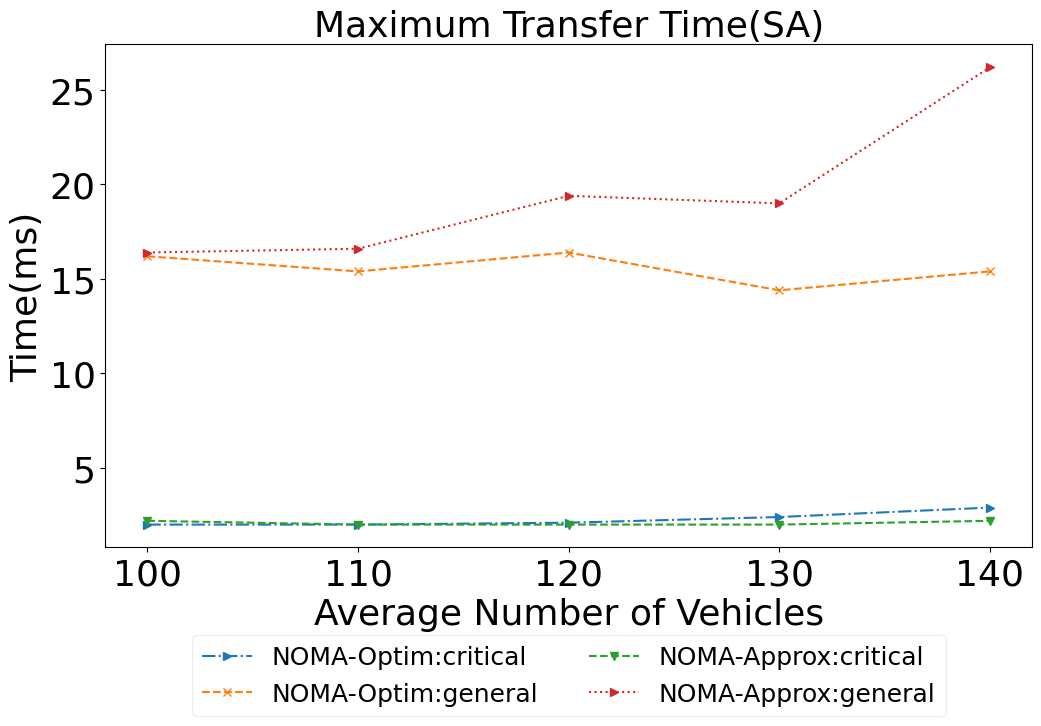

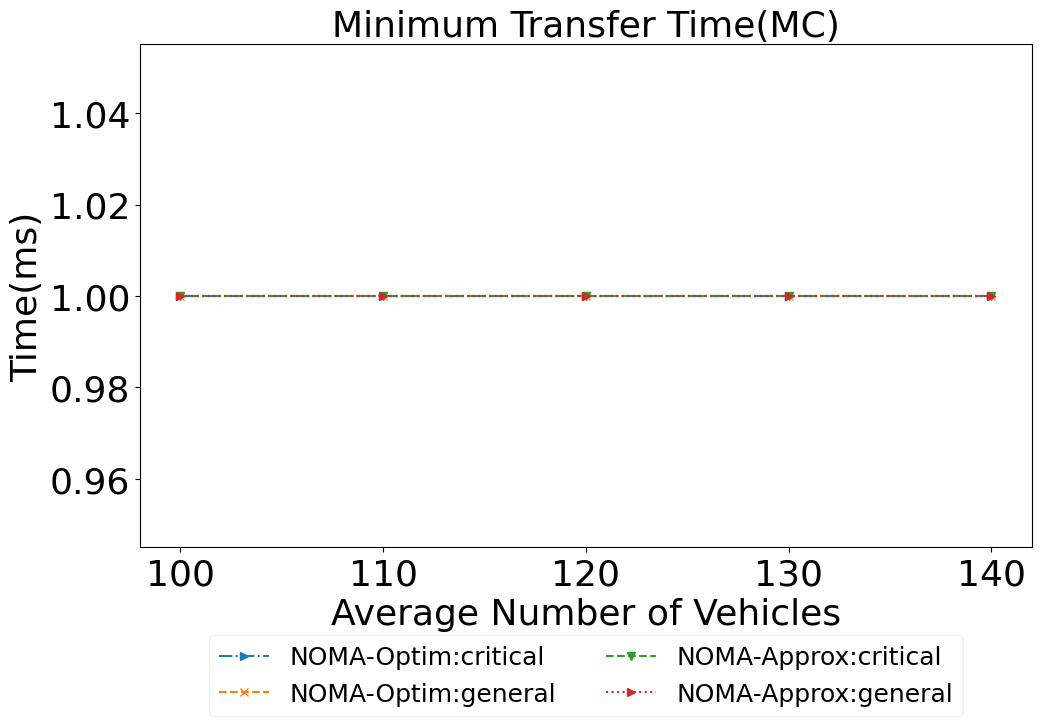

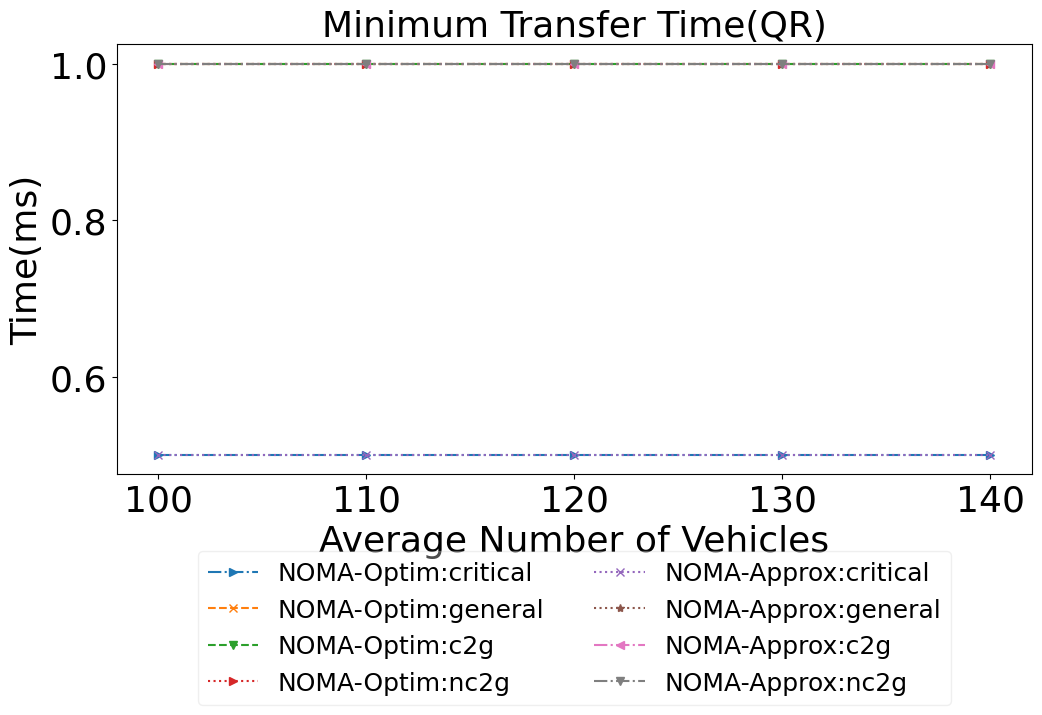

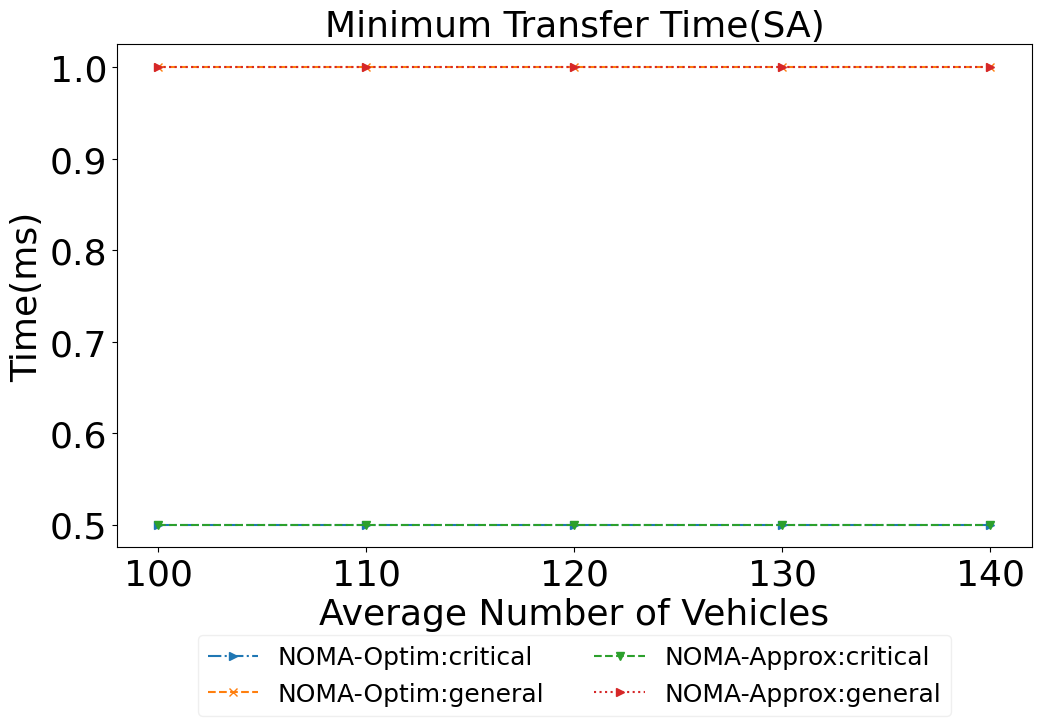

In [28]:
configs = [
    {
        "catalog": "end-to-end",
        "topic": "End-to-End Time",
        "x": "Average Number of Vehicles",
        "y": "Time(ms)",
        "subject": ["avg", "max", "min"]
    },
    {
        "catalog": "wait-time",
        "topic": "Wait Time",
        "x": "Average Number of Vehicles",
        "y": "Time(ms)",
        "subject": ["avg", "max", "min"]
    },
    {
        "catalog": "tx-time",
        "topic": "Transfer Time",
        "x": "Average Number of Vehicles",
        "y": "Time(ms)",
        "subject": ["avg", "max", "min"]
    },
]


# intialize
for config in configs:
    catalog = config["catalog"]
    topic = config["topic"]
    subjects = config["subject"]
    for subject in subjects:
        for req_rsu in req_rsu_range:
            for qos_re_class in ScenarioQoSReClassRange(req_rsu):
                title = "{} {}({})".format(
                        ExtractAbbreviations(subject),
                        topic,
                        ScenarioPrefix(req_rsu,qos_re_class)
                    )
                if(title not in graphs):
                    graphs[title] = Graph(title, config["x"], config["y"],ncols=len(res_alloc_type_range))
                graph = graphs[title]
                for res_alloc_type in res_alloc_type_range:    
                    for nft in ScenarioNetFlowType(qos_re_class):
                        y = []
                        x = [x * 100 for x in traffic_scale_range]
                        for traffic_scale in traffic_scale_range:
                            value = []
                            for seed in seed_range:
                                v = stats[qos_re_class][seed][res_alloc_type][req_rsu][traffic_scale][catalog][nft.name][subject]
                                if v == _pinf or v == _ninf:
                                    v = 0
                                value.append(v * 1000)
                            y.append(sum(value) / len(value))
                        graph.addLine(
                            Line("{}:{}".format(ScenarioAllocName(res_alloc_type), nft.name.lower()), x, y)
                        )
ShowGraphs(graphs,False)
graphs= {}

In [29]:
configs = [
    {
        "catalog": "bst-thrput",
        "topic": "Throughput",
        "x": "Average Number of Vehicles",
        "y": "Megabits",
        "subject": [bs_type for bs_type in BaseStationType]
    },
]
# intialize



for config in configs:
    catalog = config["catalog"]
    topic = config["topic"]
    subjects = config["subject"]
    for subject in subjects:
        for req_rsu in req_rsu_range:
            for qos_re_class in ScenarioQoSReClassRange(req_rsu):
                if(subject.name == "UMI" and req_rsu == False):
                    continue
                for res_alloc_type in res_alloc_type_range:
                    title = "{} {}({},{})".format(
                        subject.name, 
                        topic,
                        BaseStationScenario(req_rsu),
                        ScenarioAllocName(res_alloc_type)
                    )
                    if(title not in graphs):
                        graphs[title] = Graph(title,config["x"],config["y"])
                    graph = graphs[title]
                    if(subject.name=="UMI"):
                        nfts = [NetFlowType.CRITICAL]
                    elif(subject.name =="UMA"):
                        if req_rsu:
                            nfts = NetFlowType
                        else:
                            nfts = [NetFlowType.CRITICAL, NetFlowType.GENERAL]
                    nfts = list(map(lambda x: x.name,nfts)) + ["total"]
                    for nft in nfts:
                        y = []
                        x = [x * 100 for x in traffic_scale_range]
                        for traffic_scale in traffic_scale_range:
                            value = []
                            for seed in seed_range:
                                v =  stats[qos_re_class][seed][res_alloc_type][req_rsu][traffic_scale][catalog][subject.name][nft]
                                if v == _pinf or v == _ninf:
                                    v = 0
                                value.append(v/(10**6))
                            y.append(sum(value)/len(value))
                        graph.addLine(
                            Line("{}:{}".format(ScenarioPrefix(req_rsu,qos_re_class),nft.lower()),x,y)
                        )

In [30]:
configs = [
    {
        "catalog": "bst-sg-rate",
        "topic": "QoS Service Traffic Ratio",
        "x": "Average Number of Vehicles",
        "y": "Percentage",
        "subject": [bs_type for bs_type in BaseStationType]
    },
]


# intialize



for config in configs:
    catalog = config["catalog"]
    topic = config["topic"]
    subjects = config["subject"]
    for subject in subjects:
        for req_rsu in req_rsu_range:
            for qos_re_class in ScenarioQoSReClassRange(req_rsu):
                if(subject.name == "UMI" and req_rsu == False):
                    continue
                for res_alloc_type in res_alloc_type_range:
                    title = "{} {}({},{})".format(
                        subject.name, 
                        topic,
                        BaseStationScenario(req_rsu),
                        ScenarioAllocName(res_alloc_type)
                    )
                    if(title not in graphs):
                        graphs[title] = Graph(title,config["x"],config["y"])
                    graph = graphs[title]
                    if(subject.name=="UMI"):
                        nfts = [NetFlowType.CRITICAL]
                    elif(subject.name =="UMA"):
                        if req_rsu:
                            nfts = NetFlowType
                        else:
                            nfts = [NetFlowType.CRITICAL, NetFlowType.GENERAL]
                    nfts = list(map(lambda x: x.name,nfts))
                    for nft in nfts:
                        y = []
                        x = [x * 100 for x in traffic_scale_range]
                        for traffic_scale in traffic_scale_range:
                            value = []
                            for seed in seed_range:
                                v =  stats[qos_re_class][seed][res_alloc_type][req_rsu][traffic_scale][catalog][subject.name][nft]
                                if v == _pinf or v == _ninf:
                                    v = 0
                                value.append(v*100)
                            y.append(sum(value)/len(value))
                        graph.addLine(
                            Line("{}:{}".format(ScenarioPrefix(req_rsu,qos_re_class),nft.lower()),x,y)
                        )

In [31]:
configs = [
    {
        "catalog": "sys-thrput",
        "topic": "System Throughput",
        "x": "Average Number of Vehicles",
        "y": "Megabits",
    },
]


# intialize
for config in configs:
    catalog = config["catalog"]
    topic = config["topic"]
    title = topic
    if(title not in graphs):
        graphs[title] = Graph(title,config["x"],config["y"])
    graph = graphs[title]
    for req_rsu in req_rsu_range:
        for qos_re_class in ScenarioQoSReClassRange(req_rsu):
            for res_alloc_type in res_alloc_type_range:
                y = []
                x = [x * 100 for x in traffic_scale_range]
                for traffic_scale in traffic_scale_range:
                    value = []
                    for seed in seed_range:
                        v =  stats[qos_re_class][seed][res_alloc_type][req_rsu][traffic_scale][catalog]["total"]
                        if v == _pinf or v == _ninf:
                            v = 0
                        value.append(v/10**6)
                    y.append(sum(value)/len(value))
                graph.addLine(
                            Line( 
                                "{}:\n{}".format(
                                    ScenarioPrefix(req_rsu,qos_re_class),
                                    ScenarioAllocName(res_alloc_type)
                                ),
                                x,
                                y
                            )
                )

In [ ]:
configs = [
    {
        "catalog": "veh-arv-rate",
        "topic": "Vehicle Arrival&Deparature Rate",
        "x": "Average Number of Vehicles",
        "y": "Number",
        "subject": ["avg","max","min"],
        "io": "arv"
    },
    {
        "catalog": "veh-dep-rate",
        "topic": "Vehicle Arrival&Deparature Rate",
        "x": "Average Number of Vehicles",
        "y": "Number",
        "subject": ["avg","max","min"],
        "io": "dep"
    },
]

# intialize
for config in configs:
    catalog = config["catalog"]
    topic = config["topic"]
    subjects = config["subject"]
    for subject in subjects:
        for req_rsu in req_rsu_range:
            for qos_re_class in ScenarioQoSReClassRange(req_rsu):
                for res_alloc_type in res_alloc_type_range:
                    title = "{} {}({},{})".format(
                        ExtractAbbreviations(subject),
                        topic,
                        BaseStationScenario(req_rsu),
                        ScenarioAllocName(res_alloc_type)
                    )
                    if(title not in graphs):
                        graphs[title] = Graph(title, config["x"], config["y"])
                    graph = graphs[title]
                    for nft in ScenarioNetFlowType(qos_re_class):
                        y = []
                        x = [x * 100 for x in traffic_scale_range]
                        for traffic_scale in traffic_scale_range:
                            value = []
                            for seed in seed_range:
                                v = stats[qos_re_class][seed][res_alloc_type][req_rsu][traffic_scale][catalog][nft.name][subject]
                                if v == _pinf or v == _ninf:
                                    v = 0
                                value.append(v)
                            value.sort()
                            y.append(sum(value)/len(value))
                        if(max(y) > 0):
                            graph.addLine(
                                Line(
                                    "{}:{}-{}".format(
                                        ScenarioPrefix(req_rsu, qos_re_class),
                                        config["io"],
                                        nft.name.lower()
                                    ),
                                    x,
                                    y
                                )
                            )

In [ ]:

configs = [
    {
        "catalog": "veh-arv-size",
        "topic": "Vehicle Arrival Size",
        "x": "Average Number of Vehicles",
        "y": "Bits",
        "subject": [("avg", lambda x:x),("max", lambda x: x),("min", lambda x: x)],
    },
]

# intialize
for config in configs:
    catalog = config["catalog"]
    topic = config["topic"]
    subjects = config["subject"]
    for subject, f in subjects:
        for req_rsu in req_rsu_range:
            for qos_re_class in qos_re_class_range:
                for res_alloc_type in res_alloc_type_range:
                    title = "{} {}({},{})".format(
                        ExtractAbbreviations(subject),
                        topic,
                        BaseStationScenario(req_rsu),
                        ScenarioAllocName(res_alloc_type)
                    )
                    if(title not in graphs):
                        graphs[title] = Graph(title, config["x"], config["y"])
                    graph = graphs[title]
                    for nft in ScenarioNetFlowType(qos_re_class):
                        y = []
                        x = [x * 100 for x in traffic_scale_range]
                        for traffic_scale in traffic_scale_range:
                            value = []
                            for seed in seed_range:
                                v = stats[qos_re_class][seed][res_alloc_type][req_rsu][traffic_scale][catalog][nft.name][subject]
                                if v == _pinf or v == _ninf:
                                    v = 0
                                value.append(v)
                            value.sort()
                            y.append(sum(value)/len(value))
                        if(max(y) > 0):
                            graph.addLine(
                                Line(
                                    "{}:{}".format(
                                        ScenarioPrefix(req_rsu, qos_re_class),
                                        nft.name.lower()
                                    ),
                                    x,
                                    [f(v) for v in y]
                                )
                            )


In [ ]:

configs = [
    {
        "catalog": "bs-arv-rate",
        "topic": "BaseStation Arrival Rate",
        "x": "Average Number of Vehicles",
        "y": "Number",
        "subject": ["avg","max","min"],
        "io":"arv",
    },
     {
        "catalog": "bs-dep-rate",
        "topic": "BaseStation Arrival Rate",
        "x": "Average Number of Vehicles",
        "y": "Number",
        "subject": ["avg","max","min"],
        "io":"dep",
    },
]

# intialize
for config in configs:
    catalog = config["catalog"]
    topic = config["topic"]
    subjects = config["subject"]
    for subject in subjects:
        for req_rsu in req_rsu_range:
            for qos_re_class in ScenarioQoSReClassRange(req_rsu):
                scenario_bs_names = GetScenarioBaseStationNames(req_rsu)
                for res_alloc_type in res_alloc_type_range:
                    for bs_id in scenario_bs_names:
                        title = "{} {}({},{},{})".format(
                            ExtractAbbreviations(subject),
                            topic,
                            BaseStationScenario(req_rsu),
                            ScenarioAllocName(res_alloc_type),
                            bs_id
                        )
                        if(title not in graphs):
                            graphs[title] = Graph(title, config["x"], config["y"])
                        graph = graphs[title]
                        for nft in ScenarioNetFlowType(qos_re_class):
                            y = []
                            x = [x * 100 for x in traffic_scale_range]
                            for traffic_scale in traffic_scale_range:
                                value = []
                                for seed in seed_range:
                                    for name in scenario_bs_names:
                                        v = stats[qos_re_class][seed][res_alloc_type][req_rsu][traffic_scale][catalog][nft.name][bs_id][subject]
                                        if v == _pinf or v == _ninf:
                                            v = 0
                                        value.append(v)
                                y.append(sum(value)/len(value))
                            if(max(y) > 0):
                                graph.addLine(
                                    Line(
                                        "{}:{}-{}".format(
                                            ScenarioPrefix(req_rsu, qos_re_class),
                                            config["io"],
                                            nft.name.lower(),
                                        ),
                                        x,
                                        y
                                    )
                                )


In [ ]:
ShowGraphs(graphs,False)